In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

In [2]:
activity_data = pd.read_csv('train_physician_activity.csv')
physician_data = pd.read_csv('train_physician_data.csv')

## Data exploration

In [3]:
merged_data = pd.merge(activity_data,physician_data, on = 'physician_id')
merged_data.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,201802,0,0,0,0,0,0,0,0,...,0,0,0,NaN,0.91,0.89,M,58,83,nephrology
1,1,201803,0,10,11,0,0,1,0,0,...,1,0,0,NaN,0.91,0.89,M,58,83,nephrology
2,1,201804,1,8,8,0,0,0,0,0,...,1,109,19,NaN,0.91,0.89,M,58,83,nephrology
3,1,201901,1,11,24,0,0,0,0,0,...,1,204,18,NaN,0.91,0.89,M,58,83,nephrology
4,1,201902,1,15,44,0,0,0,0,0,...,1,180,37,NaN,0.91,0.89,M,58,83,nephrology


In [4]:
merged_data.fillna({'physician_segment': 'unknown'}, inplace = True)

In [5]:
merged_data.rename(columns  = {' ' : '#'}, inplace = True)

In [6]:
merged_data.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,201802,0,0,0,0,0,0,0,0,...,0,0,0,unknown,0.91,0.89,M,58,83,nephrology
1,1,201803,0,10,11,0,0,1,0,0,...,1,0,0,unknown,0.91,0.89,M,58,83,nephrology
2,1,201804,1,8,8,0,0,0,0,0,...,1,109,19,unknown,0.91,0.89,M,58,83,nephrology
3,1,201901,1,11,24,0,0,0,0,0,...,1,204,18,unknown,0.91,0.89,M,58,83,nephrology
4,1,201902,1,15,44,0,0,0,0,0,...,1,180,37,unknown,0.91,0.89,M,58,83,nephrology


In [8]:
merged_data.to_csv('merged_data.csv')

In [10]:
merged_data['physician_speciality'].value_counts()

physician_speciality
nephrology    77680
other         16240
urology        6080
Name: count, dtype: int64

In [16]:
merged_data = pd.read_csv('merged_data.csv')

In [17]:
merged_data.groupby(['physician_speciality','physician_segment']).count()[['#']]

#
physician_speciality physician_segment       
nephrology           High               14670
                     Low                 3269
                     Medium              6762
                     Very High          13312
                     unknown            39667
other                High                3028
                     Low                 1322
                     Medium              1851
                     Very High           1788
                     unknown             8251
urology              High                1069
                     Low                  476
                     Medium               599
                     Very High            756
                     unknown             3180

In [18]:
merged_data.groupby(['physician_segment']).agg({
    'total_representative_visits' : ['count','mean','median'],
    'total_sample_dropped' :['count','mean','median'],
})

total_representative_visits                    \
                                        count       mean median   
physician_segment                                                 
High                                    18767   7.286194    7.0   
Low                                      5067   5.054075    4.0   
Medium                                   9212   6.209292    5.0   
Very High                               15856  11.111062   10.0   
unknown                                 51098   6.946241    5.0   

                  total_sample_dropped                    
                                 count       mean median  
physician_segment                                         
High                             18767  14.118506    2.0  
Low                               5067   5.119400    0.0  
Medium                            9212  10.293530    0.0  
Very High                        15856  19.295283    6.0  
unknown                          51098   5.452640    0.0

In [19]:
merged_data['brand_impression']= merged_data[
    [
        'brand_web_impressions',
        'brand_ehr_impressions',
        'brand_enews_impressions',
        'brand_mobile_impressions',
        'brand_organic_web_visits',
        'brand_paidsearch_visits'
    ]
].sum(axis=1)

In [20]:
merged_data['seminar attended']= merged_data[
    [
        'total_seminar_as_attendee',
        'total_seminar_as_speaker',
    ]
].sum(axis=1)

In [21]:
merged_data['patients with insurance']= merged_data[
    [
        'total_patient_with_commercial_insurance_plan',
        'total_patient_with_medicare_insurance_plan',
        'total_patient_with_medicaid_insurance_plan',
    ]
].sum(axis=1)

In [22]:
columns_to_drop = [
    'total_prescriptions_for_indication1',
    'total_prescriptions_for_indication2',
    'total_prescriptions_for_indication3',
    'brand_web_impressions',
    'brand_ehr_impressions',
    'brand_enews_impressions',
    'brand_mobile_impressions',
    'brand_organic_web_visits',
    'brand_paidsearch_visits',
    'total_patient_with_commercial_insurance_plan',
    'total_patient_with_medicare_insurance_plan',
    'total_patient_with_medicaid_insurance_plan',
    'total_seminar_as_attendee',
    'total_seminar_as_speaker',
]

merged_data = merged_data.drop(columns=columns_to_drop)

In [23]:
merged_data = merged_data.drop(columns={'saving_cards_dropped','vouchers_dropped'})

In [24]:
merged_data.dtypes

#                                                        int64
physician_id                                             int64
year_quarter                                             int64
brand_prescribed                                         int64
total_representative_visits                              int64
total_sample_dropped                                     int64
physician_hospital_affiliation                           int64
physician_in_group_practice                              int64
total_competitor_prescription                            int64
new_prescriptions                                        int64
physician_segment                                       object
urban_population_perc_in_physician_locality            float64
percent_population_with_health_insurance_in_last10q    float64
physician_gender                                        object
physician_tenure                                         int64
physician_age                                          

In [92]:
merged_data.isna().sum()

#                                                      0
physician_id                                           0
year_quarter                                           0
brand_prescribed                                       0
total_representative_visits                            0
total_sample_dropped                                   0
physician_hospital_affiliation                         0
physician_in_group_practice                            0
total_competitor_prescription                          0
new_prescriptions                                      0
physician_segment                                      0
urban_population_perc_in_physician_locality            0
percent_population_with_health_insurance_in_last10q    0
physician_gender                                       0
physician_tenure                                       0
physician_age                                          0
physician_speciality                                   0
brand_impression               

In [35]:
merged_data.to_csv('merged_data.csv')

In [25]:
merged_data.describe()

,#,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_tenure,physician_age,brand_impression,seminar attended,patients with insurance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,5000.500000,201902.500000,0.453850,7.506650,9.702910,0.185100,0.958200,337.530720,51.999210,0.920926,0.643073,28.058500,60.116900,5.585690,0.176660,216.263020
std,28867.657797,2886.765765,77.078592,0.497868,6.672713,26.254091,0.388381,0.200133,393.584016,87.135455,0.167215,0.322035,13.326359,14.072598,15.024499,0.811479,257.791046
min,0.000000,1.000000,201802.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,3.000000,28.000000,0.000000,0.000000,0.000000
25%,24999.750000,2500.750000,201804.000000,0.000000,2.000000,0.000000,0.000000,1.000000,70.000000,2.000000,0.930000,0.350000,18.000000,51.000000,2.000000,0.000000,46.000000
50%,49999.500000,5000.500000,201902.500000,0.000000,6.000000,0.000000,0.000000,1.000000,236.000000,23.000000,1.000000,0.840000,29.000000,61.000000,2.000000,0.000000,151.000000
75%,74999.250000,7500.250000,202001.000000,1.000000,11.000000,9.000000,0.000000,1.000000,475.000000,66.000000,1.000000,0.920000,38.000000,70.000000,6.000000,0.000000,301.000000
max,99999.000000,10000.000000,202003.000000,1.000000,55.000000,1392.000000,1.000000,1.000000,9199.000000,3790.000000,1.000000,1.000000,68.000000,94.000000,825.000000,89.000000,7727.000000


In [26]:
merged_data['brand_prescribed'].value_counts()

brand_prescribed
0    54615
1    45385
Name: count, dtype: int64

## Go beyond numbers 

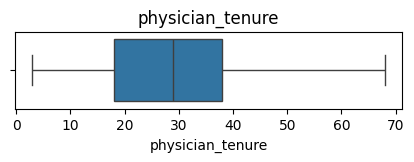

In [27]:
plt.figure(figsize=(5,1))
plt.title('physician_tenure')
sns.boxplot(x=merged_data['physician_tenure']);

<Axes: title={'center': 'Physician tenure'}, xlabel='physician_tenure', ylabel='Count'>

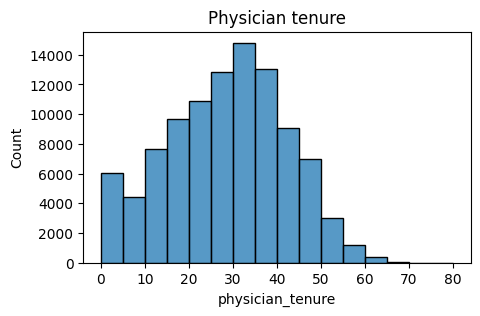

In [28]:
plt.figure(figsize=(5,3))
plt.title('Physician tenure')
sns.histplot(merged_data['physician_tenure'], bins = range(0,81,5))

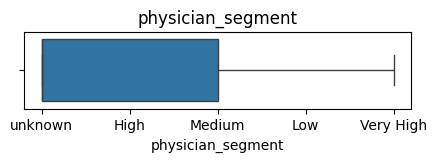

In [29]:
plt.figure(figsize=(5,1))
plt.title('physician_segment')
sns.boxplot(x=merged_data['physician_segment']);

<Axes: title={'center': 'physician_segment '}, xlabel='physician_segment', ylabel='Count'>

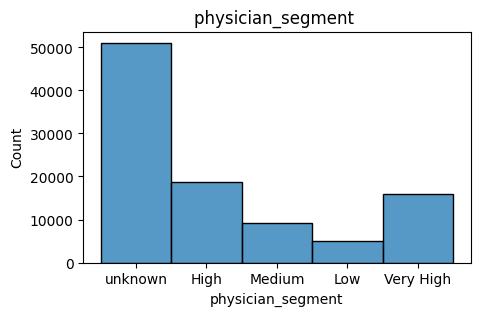

In [30]:
plt.figure(figsize=(5,3))
plt.title('physician_segment ')
sns.histplot(merged_data['physician_segment'])

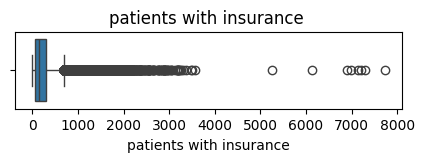

In [31]:
plt.figure(figsize=(5,1))
plt.title('patients with insurance ')
sns.boxplot(x=merged_data['patients with insurance']);

<Axes: title={'center': 'patients with insurance '}, xlabel='patients with insurance', ylabel='Count'>

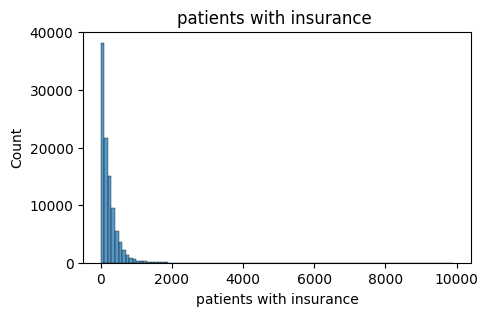

In [32]:
plt.figure(figsize=(5,3))
plt.title('patients with insurance ')
sns.histplot(merged_data['patients with insurance'], bins = range(0,10000,100))

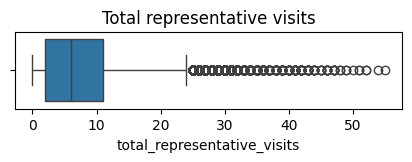

In [60]:
plt.figure(figsize=(5,1))
plt.title('Total representative visits')
sns.boxplot(x=merged_data['total_representative_visits']);

<Axes: title={'center': 'Total representative visits'}, xlabel='total_representative_visits', ylabel='Count'>

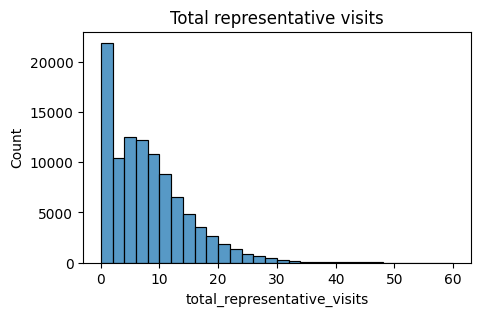

In [61]:
plt.figure(figsize=(5,3))
plt.title('Total representative visits')
sns.histplot(merged_data['total_representative_visits'], bins = range(0,61,2))

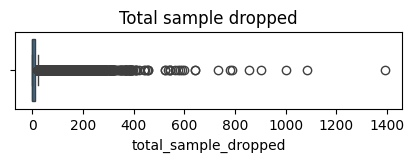

In [62]:
plt.figure(figsize=(5,1))
plt.title('Total sample dropped')
sns.boxplot(x=merged_data['total_sample_dropped']);

<Axes: title={'center': 'Total sample dropped'}, xlabel='total_sample_dropped', ylabel='Count'>

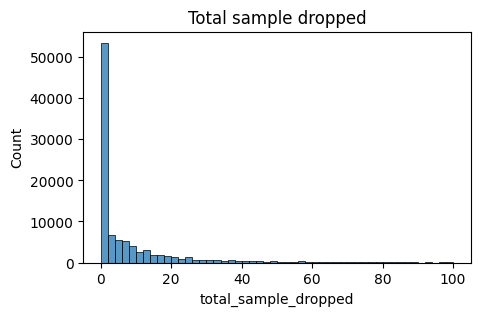

In [64]:
plt.figure(figsize=(5,3))
plt.title('Total sample dropped')
sns.histplot(merged_data['total_sample_dropped'], bins = range(0,101,2))

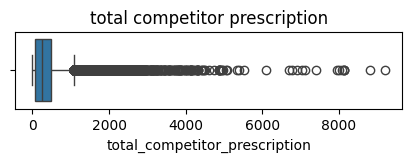

In [65]:
plt.figure(figsize=(5,1))
plt.title('total competitor prescription')
sns.boxplot(x=merged_data['total_competitor_prescription']);

<Axes: title={'center': 'Total competitor prescription '}, xlabel='total_competitor_prescription', ylabel='Count'>

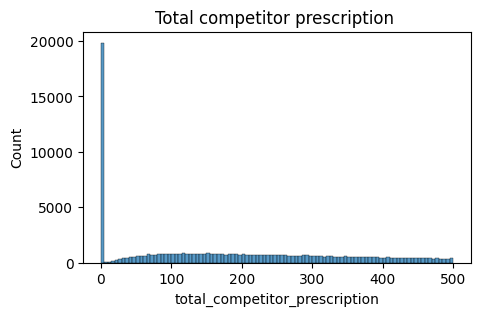

In [69]:
plt.figure(figsize=(5,3))
plt.title('Total competitor prescription ')
sns.histplot(merged_data['total_competitor_prescription'], bins = range(0,501,5))

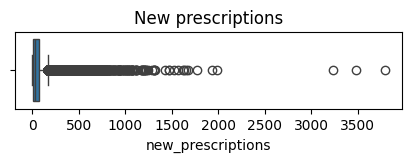

In [70]:
plt.figure(figsize=(5,1))
plt.title('New prescriptions')
sns.boxplot(x=merged_data['new_prescriptions']);

<Axes: title={'center': 'New prescriptions'}, xlabel='new_prescriptions', ylabel='Count'>

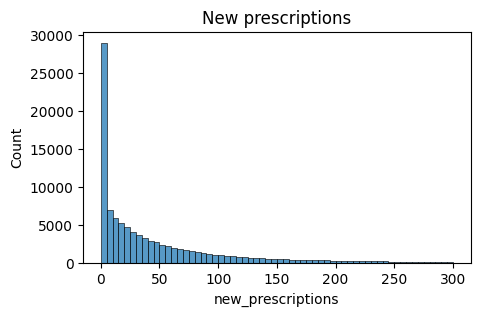

In [72]:
plt.figure(figsize=(5,3))
plt.title('New prescriptions')
sns.histplot(merged_data['new_prescriptions'], bins = range(0,301,5))

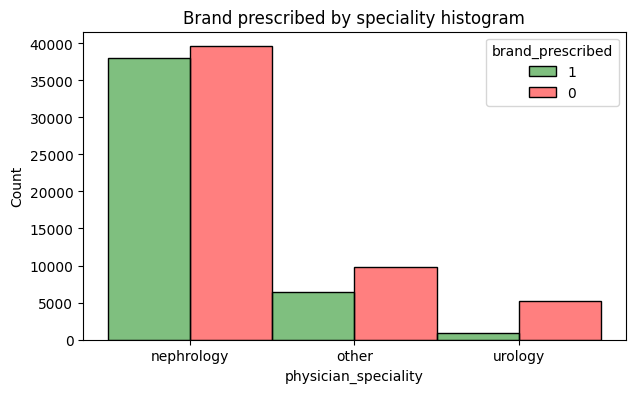

In [33]:
plt.figure(figsize=(7,4))
sns.histplot(merged_data,
             x='physician_speciality',
             hue='brand_prescribed',
             hue_order = [1,0],
             palette= {0:'red',1:'green'},
             multiple='dodge',
             alpha=0.5)
plt.title('Brand prescribed by speciality histogram');

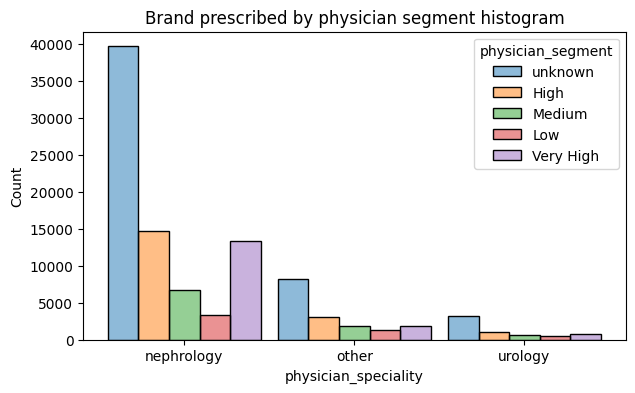

In [34]:
plt.figure(figsize=(7,4))
sns.histplot(merged_data,
             x='physician_speciality',
             hue='physician_segment',
             multiple='dodge',
             shrink=0.9,
             alpha=0.5)
plt.title('Brand prescribed by physician segment histogram');

Text(0.5, 1.0, 'Total new prescriptions by speciality')

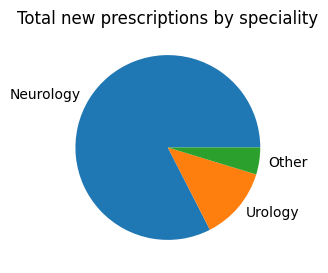

In [75]:
fig = plt.figure(figsize = (3,3))
plt.pie(merged_data.groupby('physician_speciality')['new_prescriptions'].sum(), labels = ['Neurology', 'Urology', 'Other'])
plt.title('Total new prescriptions by speciality')


In [88]:
count_cols = [
    'physician_tenure',
    'new_prescriptions',
    'total_competitor_prescription',
    'total_sample_dropped',
    'total_representative_visits',
    'patients with insurance',
]

for column in count_cols:
    q1 = merged_data[column].quantile(0.25)
    q3 = merged_data[column].quantile(0.75)
    iqr = q3 - q1
    median = merged_data[column].median()
    outlier_threshold = median + 1.5 * iqr
    outlier_count = (merged_data[column] > outlier_threshold).sum()
    print(f"Number of outliers in {column}: ",outlier_count)

Number of outliers in physician_tenure:  370
Number of outliers in new_prescriptions:  12313
Number of outliers in total_competitor_prescription:  8495
Number of outliers in total_sample_dropped:  19239
Number of outliers in total_representative_visits:  5844
Number of outliers in patients with insurance:  8744


In [100]:
columns_to_transform = [
    'physician_tenure',
    'new_prescriptions',
    'total_competitor_prescription',
    'total_sample_dropped',
    'total_representative_visits',
    'patients with insurance'
]

for column in columns_to_transform:
    if (merged_data[column] >= 0).all():
        merged_data[f'sqrt_{column}'] = np.sqrt(merged_data[column])
    else:
        print(f"Square root transformation skipped for {column} due to negative values.")


In [104]:
count_cols = [
    'sqrt_physician_tenure',
    'sqrt_new_prescriptions',
    'sqrt_total_competitor_prescription',
    'sqrt_total_sample_dropped',
    'sqrt_total_representative_visits',
    'sqrt_patients with insurance',
]

for column in count_cols:
    q1 = merged_data[column].quantile(0.25)
    q3 = merged_data[column].quantile(0.75)
    iqr = q3 - q1
    median = merged_data[column].median()
    outlier_threshold = median + 1.5 * iqr
    outlier_count = (merged_data[column] > outlier_threshold).sum()
    print(f"Number of outliers in {column}: ",outlier_count)

Number of outliers in sqrt_physician_tenure:  0
Number of outliers in sqrt_new_prescriptions:  4136
Number of outliers in sqrt_total_competitor_prescription:  2896
Number of outliers in sqrt_total_sample_dropped:  12883
Number of outliers in sqrt_total_representative_visits:  922
Number of outliers in sqrt_patients with insurance:  3092


## Statistical analysis

### Hypothesis testing

*   **Null hypothesis**: There is no difference in number of new prescriptions made by diffrent specializations
*    **Alternative hypothesis**: There is a difference in number of new prescriptions made by diffrent specializations.

In [109]:
group1 = merged_data[merged_data['brand_prescribed'] == 1]  # Physicians who have prescribed Axtenna
group2 = merged_data[merged_data['brand_prescribed'] == 0]  # Physicians who have not prescribed Axtenna

features_to_test = [
    'physician_tenure',
    'total_representative_visits',
    'total_sample_dropped',
    'physician_age',
    'new_prescriptions',
    'total_competitor_prescription',
    'patients with insurance'
]

def perform_ttest(feature):
    data_group1 = group1[feature]
    data_group2 = group2[feature]
    
    t_stat, p_value = ttest_ind(data_group1, data_group2)
    
    print(f"Feature: {feature}")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    print("-" * 50)
    
for feature in features_to_test:
    perform_ttest(feature)

Feature: physician_tenure
T-statistic: -1.3474, P-value: 0.1778
--------------------------------------------------
Feature: total_representative_visits
T-statistic: 115.0301, P-value: 0.0000
--------------------------------------------------
Feature: total_sample_dropped
T-statistic: 91.7111, P-value: 0.0000
--------------------------------------------------
Feature: physician_age
T-statistic: -2.1185, P-value: 0.0341
--------------------------------------------------
Feature: new_prescriptions
T-statistic: 92.6754, P-value: 0.0000
--------------------------------------------------
Feature: total_competitor_prescription
T-statistic: 105.2401, P-value: 0.0000
--------------------------------------------------
Feature: patients with insurance
T-statistic: 110.9913, P-value: 0.0000
--------------------------------------------------


In [116]:
group1 = merged_data[merged_data['brand_prescribed'] == 1]  # Physicians who have prescribed Axtenna
group2 = merged_data[merged_data['brand_prescribed'] == 0]  # Physicians who have not prescribed Axtenna

features_to_test = [
    'sqrt_physician_tenure',
    'sqrt_new_prescriptions',
    'sqrt_total_competitor_prescription',
    'sqrt_total_sample_dropped',
    'sqrt_total_representative_visits',
    'sqrt_patients with insurance',
]

def perform_ttest(feature):
    data_group1 = group1[feature]
    data_group2 = group2[feature]
    
    t_stat, p_value = ttest_ind(data_group1, data_group2)
    
    print(f"Feature: {feature}")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    print("-" * 50)
    
for feature in features_to_test:
    perform_ttest(feature)

Feature: sqrt_physician_tenure
T-statistic: -0.7937, P-value: 0.4274
--------------------------------------------------
Feature: sqrt_new_prescriptions
T-statistic: 142.4495, P-value: 0.0000
--------------------------------------------------
Feature: sqrt_total_competitor_prescription
T-statistic: 152.4517, P-value: 0.0000
--------------------------------------------------
Feature: sqrt_total_sample_dropped
T-statistic: 144.4039, P-value: 0.0000
--------------------------------------------------
Feature: sqrt_total_representative_visits
T-statistic: 135.3689, P-value: 0.0000
--------------------------------------------------
Feature: sqrt_patients with insurance
T-statistic: 161.7203, P-value: 0.0000
--------------------------------------------------


## Build a regression model

In [126]:
merged_data[['sqrt_physician_tenure',
    'new_prescriptions',
    'total_competitor_prescription',
    'total_sample_dropped',
    'total_representative_visits',
    'patients with insurance',]].corr(numeric_only = True)

,sqrt_physician_tenure,new_prescriptions,total_competitor_prescription,total_sample_dropped,total_representative_visits,patients with insurance
sqrt_physician_tenure,1.000000,0.045619,0.066398,0.010733,0.026745,0.090511
new_prescriptions,0.045619,1.000000,0.729476,0.219320,0.283073,0.684014
total_competitor_prescription,0.066398,0.729476,1.000000,0.175036,0.403470,0.938628
total_sample_dropped,0.010733,0.219320,0.175036,1.000000,0.274074,0.186930
total_representative_visits,0.026745,0.283073,0.403470,0.274074,1.000000,0.397311
patients with insurance,0.090511,0.684014,0.938628,0.186930,0.397311,1.000000


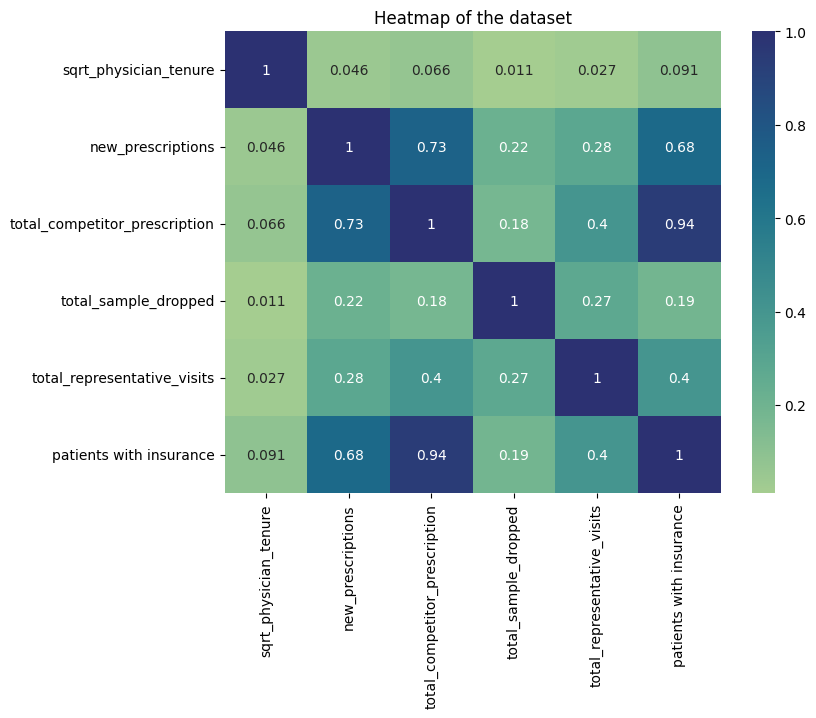

In [125]:
plt.figure(figsize = (8,6))
c
sns.heatmap(merged_data[['sqrt_physician_tenure',
    'new_prescriptions',
    'total_competitor_prescription',
    'total_sample_dropped',
    'total_representative_visits',
    'patients with insurance',]].corr(numeric_only = True), annot = True ,cmap = 'crest')

plt.title("Heatmap of the dataset")
plt.show()

In [127]:
merged_data['brand_prescribed'].value_counts(normalize = True)

brand_prescribed
0    0.54615
1    0.45385
Name: proportion, dtype: float64

In [129]:
X = merged_data[['sqrt_physician_tenure',
    'new_prescriptions',
    'total_competitor_prescription',
    'total_sample_dropped',
    'total_representative_visits',
    'patients with insurance',]]
X.head()

,sqrt_physician_tenure,new_prescriptions,total_competitor_prescription,total_sample_dropped,total_representative_visits,patients with insurance
0,7.615773,0,0,0,0,0
1,7.615773,0,0,11,10,0
2,7.615773,19,109,8,8,84
3,7.615773,18,204,24,11,155
4,7.615773,37,180,44,15,140


In [130]:
y = merged_data['brand_prescribed']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [132]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75000, 6), (25000, 6), (75000,), (25000,))

In [168]:
X_train.dtypes

sqrt_physician_tenure            float64
new_prescriptions                  int64
total_competitor_prescription      int64
total_sample_dropped               int64
total_representative_visits        int64
patients with insurance            int64
dtype: object

In [169]:
log_clf = LogisticRegression(random_state = 42, max_iter = 1000).fit(X_train, y_train)

In [170]:
y_pred = log_clf.predict(X_test)

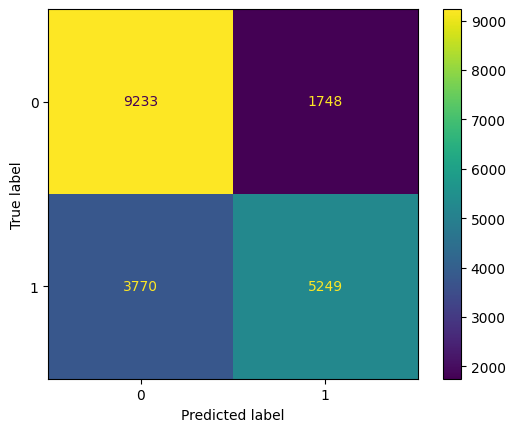

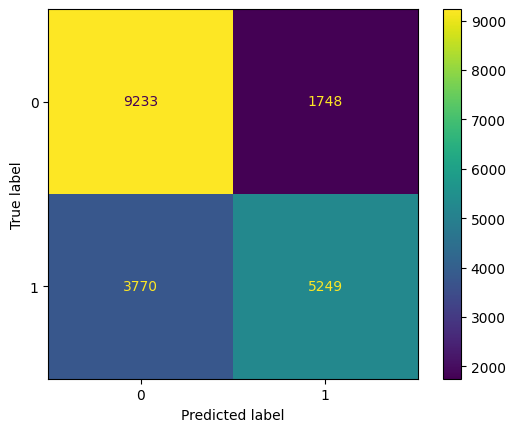

In [171]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

In [141]:
(11579 + 6567)/ (11579+2223+4631+6567)

0.72584

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77     13802
           1       0.75      0.59      0.66     11198

    accuracy                           0.73     25000
   macro avg       0.73      0.71      0.71     25000
weighted avg       0.73      0.73      0.72     25000



### **Build a random forest model**

In [149]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [150]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [157]:
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [158]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 28min 2s
Wall time: 28min 4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [159]:
rf_cv.best_score_

0.7807173776429857

In [173]:
y_pred = rf_cv.best_estimator_.predict(X_val)

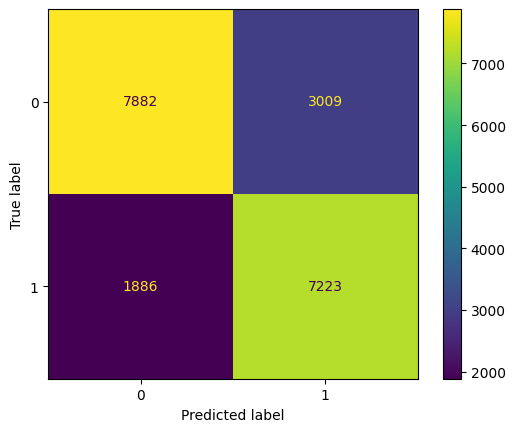

In [174]:
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [175]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76     10891
           1       0.71      0.79      0.75      9109

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.75     20000
weighted avg       0.76      0.76      0.76     20000



### **Build a XGBoost model**

In [162]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [163]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 32min 6s
Wall time: 4min 10s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [164]:
xgb_cv.best_score_

0.7545583860372533

In [177]:
y_pred = xgb_cv.best_estimator_.predict(X_val)

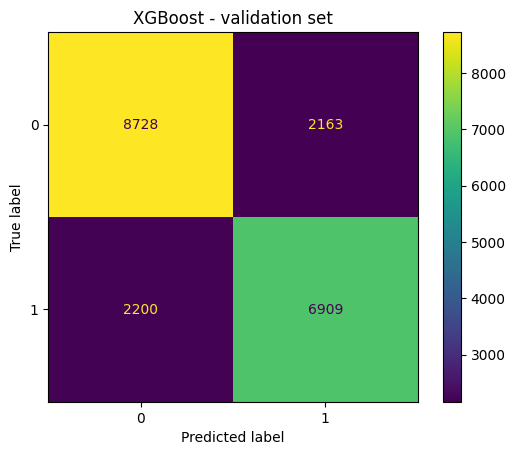

In [178]:
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()


In [181]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10891
           1       0.76      0.76      0.76      9109

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000

